# 3.2: ElasticNet Penalty and Efficient Solution - glmnet

## Readings
https://en.wikipedia.org/wiki/Elastic_net_regularization  
https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_finite_dimensions  
http://statweb.stanford.edu/~jhf/ftp/glmnet.pdf  
http://ai.stanford.edu/~ang/papers/icml04-l1l2.pdf  


## Penalty Functions
In the last lecture you saw how the introduction of a sum-of-squared penalty on the weights could serve to regularize linear regression.  The penalty forced the weight vector to be somewhat smaller in magnitude than the weights for unconstrained ordinary least squares regression.  Sum of squares isn't the only way to quantify the length of a vector.  Sum of squares corresponds to Euclidean distance and is referred to in the literature as $L_2$-norm.  But any Minkowski norm could be used as a penalty.  Thus the penalized regression problem you saw last time was 

$w^*, b^* = argmin_{w, b} \frac1M \sum_{i=1}^M (y_i - (b + x_i w^T))^2  + \alpha (w_1^2 + w_2^2 + ... + w_N^2)$

This looks a little different because the squares of the weights are written out instead of being expressed (equivalently) as $ww^T$.  The power to which each weight is raised before being squared could be any positive number p.  

$w^*, b^* = argmin_{w, b} \frac1M \sum_{i=1}^M (y_i - (b + x_i w^T))^2  + \alpha (|w_1|^p + |w_2|^p + ... + |w_N|^p)$

These are related to Minkowski norms.  https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_finite_dimensions.  As a practical matter, the versions most frequently used as regression penalties are $L_2$ and $L_1$.  $L_1$ corresponds to $p=1$ and $L_2$ corresponds to $p=2$.  Notice that the precise penalty used in ridge regression is not a norm, but the square of the $L_2$ norm.  The $L_1$ norm of the weights is the sum of the absolute values of the weights.  The choice of using $L_1$ versus $L_2$ matters because it leads to some useful differences in the solutions to the penalized regression problem.  The principal differences are 1) $L_1$ gives sparse weight vectors and is less sensitive to irrelevant features (Ng paper).  2) $L_2$ deals better with correlated attributes.  You can understand some of these differences by referring to one of the figures from "Elements of Statistical Learning" - the excellent book on machine learning by Stanford professors Hastie, Tibshirani and Friedman.  This link will take you to the website for the book (which is free online).  
http://statweb.stanford.edu/~tibs/ElemStatLearn/ - Figure 3.11.  The figures from the book are repeated below.  

<img src='images/Ridge_Regression.png'>

<img src='images/Lasso_Regression.png'>

The point to be made from this figure is that the solutions with $L_1$ penalty get stuck on the points of the $L_1$-ball.  These points are aligned along the coordinate axes which means automatically that some of the weights are zero.  

## ElasticNet Penalty
ElasticNet (https://web.stanford.edu/~hastie/Papers/elasticnet.pdf) is a penalty developed by Zou and Hastie at Stanford specifically for penalized regression.  Here's that the ElasticNet penalty looks like.  

$ElasticNet Penalty = P_{\lambda}(w) = (1 - \lambda)(w_1^2 + w_2^2 + ... + w_N^2) + \lambda(|w_1| + |w_2| + ... + |w_N|)$

<img src='images/elasticnet2.png'>

This penalty is a blend of $L_1$ and $L_2$.  In this expression $\lambda$ is a parameter that ranges from 0 to 1.  It controls whether the blend is more heavily $L_1$ or $L_2$.  If $\lambda = 0$, then the penalty is all $L_2$.  If $\lambda = 1$, then the penalty is all $L_1$.  

Friedman's glmnet paper shows the coefficient curves for different values of the $\lambda$ parameter.  That paper outlines a very fast solution approach that makes glmnet a very scalable algorithm for solving penalized regression problems.  One nice feature of the Glmnet algo is that you don't have to hunt around for the correct range of penalty parameters.  The algo calculates the correct range for you.  Another nice feature is that the Glmnet algo generates the entire regularization curve with a single call and is demonstrably as fast as solving for individual points by gradient descent.  The sklearn package "ElasticNet" provides a python version.  The code below demonstrates its use.  


0.009828323753
[ 9.82832375  9.16592763  8.54817478  7.97205641  7.43476649  6.93368811
  6.46638074  6.03056832  5.6241282   5.24508078  4.89157989  4.56190378
  4.25444673  3.96771126  3.7003008   3.45091291  3.21833293  3.00142806
  2.79914186  2.61048906  2.43455084  2.27047026  2.11744816  1.97473924
  1.84164843  1.71752749  1.60177188  1.49381782  1.3931395   1.29924656
  1.21168169  1.1300184   1.05385894  0.98283238  0.91659276  0.85481748
  0.79720564  0.74347665  0.69336881  0.64663807  0.60305683  0.56241282
  0.52450808  0.48915799  0.45619038  0.42544467  0.39677113  0.37003008
  0.34509129  0.32183329  0.30014281  0.27991419  0.26104891  0.24345508
  0.22704703  0.21174482  0.19747392  0.18416484  0.17175275  0.16017719
  0.14938178  0.13931395  0.12992466  0.12116817  0.11300184  0.10538589
  0.09828324  0.09165928  0.08548175  0.07972056  0.07434766  0.06933688
  0.06466381  0.06030568  0.05624128  0.05245081  0.0489158   0.04561904
  0.04254447  0.03967711  0.03700301

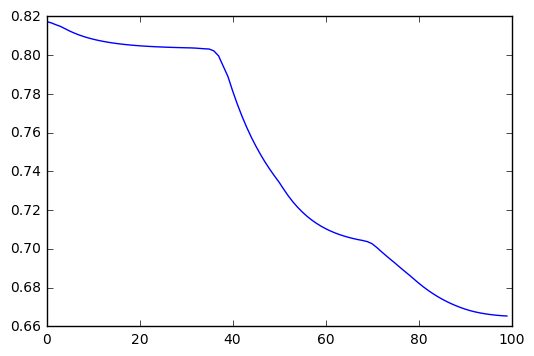

instance

In [16]:
__author__ = 'mike bowles'

from sklearn.linear_model import ElasticNet, ElasticNetCV
import urllib2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib2.urlopen(target_url)
x = []
y = []
names = []
firstLine = True
for row in data:
    if firstLine:
        names = row.strip().split(";")
        firstLine = False
    else:
        rowSplit = row.strip().split(";")
        y.append(float(rowSplit.pop()))
        floatRow = [float(num) for num in rowSplit]
        x.append(floatRow)

        # normalize = False
eNetModel = ElasticNetCV(l1_ratio=0.5, normalize=False, cv=5, verbose=0, random_state=None, selection='cyclic')


eNetModel.fit(x,y)

print eNetModel.alpha_
print eNetModel.alphas_
xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
print xvalError

plt.plot(xvalError)
plt.show()

type(data)

Normalizing the data makes a big difference in having a smoother, accurate, graph.  We can't think of a reason not to normalize.

with normalize = False, low values of alpha result in high error, then comes to a point at around alpha = 40, when the error starts to drop significantly.

## In class coding exercises
1.  Rerun the code above for various values of l1_ratio (named $\lambda$ in the discussion above). 
2.  Rerun the code with normalize=False.  How much difference does that make?
3.  Extract the coefficients corresponding to the best choice of alpha.

/Users/justin/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


1e-15
[  1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.00000000e-15   1.00000000e-15   1.00000000e-15
   1.00000000e-15   1.000000

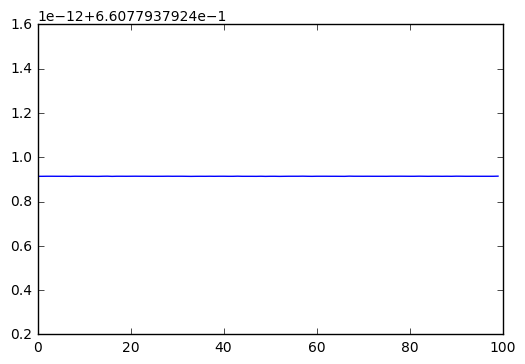

In [17]:
# lambda = 0, ridge regression

eNetModel = ElasticNetCV(l1_ratio=1*10^-6, normalize=True, cv=5, verbose=0, random_state=None, selection='cyclic')

eNetModel.fit(x,y)

print eNetModel.alpha_
print eNetModel.alphas_
xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
print xvalError

plt.plot(xvalError)
plt.show()

0.000136267920545
[  9.61343241e-03   8.96551924e-03   8.36127325e-03   7.79775142e-03
   7.27220907e-03   6.78208652e-03   6.32499658e-03   5.89871298e-03
   5.50115947e-03   5.13039973e-03   4.78462796e-03   4.46216005e-03
   4.16142540e-03   3.88095925e-03   3.61939559e-03   3.37546044e-03
   3.14796570e-03   2.93580335e-03   2.73794003e-03   2.55341204e-03
   2.38132061e-03   2.22082757e-03   2.07115123e-03   1.93156257e-03
   1.80138171e-03   1.67997462e-03   1.56674995e-03   1.46115625e-03
   1.36267921e-03   1.27083919e-03   1.18518888e-03   1.10531112e-03
   1.03081685e-03   9.61343241e-04   8.96551924e-04   8.36127325e-04
   7.79775142e-04   7.27220907e-04   6.78208652e-04   6.32499658e-04
   5.89871298e-04   5.50115947e-04   5.13039973e-04   4.78462796e-04
   4.46216005e-04   4.16142540e-04   3.88095925e-04   3.61939559e-04
   3.37546044e-04   3.14796570e-04   2.93580335e-04   2.73794003e-04
   2.55341204e-04   2.38132061e-04   2.22082757e-04   2.07115123e-04
   1.93156257e-0

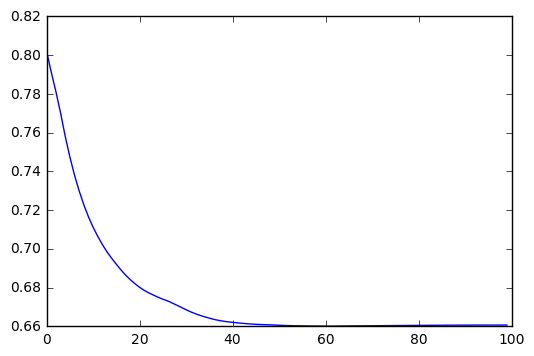

In [18]:
# lambda = 1, lasso regression

eNetModel = ElasticNetCV(l1_ratio=1, normalize=True, cv=5, verbose=0, random_state=None, selection='cyclic')

eNetModel.fit(x,y)

print eNetModel.alpha_
print eNetModel.alphas_
xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
print xvalError

plt.plot(xvalError)
plt.show()

In [19]:
# Extract the coefficients corresponding to the best choice of alpha.
# For each lambda, find the best alpha, which is the one with least error.

# lambda = .5, lasso regression

def find_min_error(x, y, n):

    eNetModel = ElasticNetCV(l1_ratio=n, normalize=True, cv=5, verbose=0, random_state=None, selection='cyclic')

    eNetModel.fit(x,y)

#     print eNetModel.alpha_
#     print eNetModel.alphas_
    xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
    print "\nleast error for lambda =", n, " is:", min(xvalError)

#     plt.plot(xvalError)
#     plt.show()
    
for n in [0.1,0.2,0.4,0.5,0.6,0.8,0.9]:
    find_min_error(x, y, n)


least error for lambda = 0.1  is: 0.660616682804

least error for lambda = 0.2  is: 0.660198077843

least error for lambda = 0.4  is: 0.660188051527

least error for lambda = 0.5  is: 0.660193809183

least error for lambda = 0.6  is: 0.660202339386

least error for lambda = 0.8  is: 0.660245762365

least error for lambda = 0.9  is: 0.660258125942


As we can see, the value of lambda that gives the least error for alpha is lambda = 0.4.

## Lab 3.2 - 1
See what kind of performance you can get on the breast cancer prognosis data using ElasticNet.  

In [1]:
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29

from sklearn.linear_model import ElasticNet, ElasticNetCV
import urllib2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# target_url = "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29.csv"
# data = urllib2.urlopen(target_url)

with open('breast-cancer-wisconsin.data.txt') as f:
    data = f.readlines()
    
x = []
y = []
names = []
firstLine = True

type(data)

list

In [5]:
# # for row in data:
# #     if firstLine:
# #         names = row.strip().split(";")
# #         firstLine = False
# #     else:
# #         rowSplit = row.strip().split(";")
# #         try:
# #             y.append(float(rowSplit.pop()))
# #             floatRow = [float(num) for num in rowSplit]
# #         except ValueError:
# #             pass
# # #             rowSplit.pop()
# # #             y.append(list(xrange(len(y[0]))))
# # #         y.append(rowSplit.pop())
# #         x.append(floatRow)

# X = []
# y = []
# names = ['Clump Thickness', 'Cell Size Uniformity', 'Cell Shape Uniformity', ' Marginal Adhesion',\
#          'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

# for row in data:
#     # parse data
#     rowSplit = row.strip().split(",")
#     # get rid of user ID number
#     rowSplit = rowSplit[1:]
#     # conver to float
#     floatRow = [float(num) for num in rowSplit[:len(rowSplit)-1] if num != '?']
    
#     if len(floatRow) == len(rowSplit)-1:
#         X.append(floatRow)
#         y.append(float(rowSplit[-1]))



#         # normalize = False
# eNetModel = ElasticNetCV(l1_ratio=0.5, normalize=False, cv=5, verbose=0, random_state=None, selection='cyclic')


# eNetModel.fit(x,y)

# print eNetModel.alpha_
# print eNetModel.alphas_
# xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
# print xvalError

# plt.plot(xvalError)
# plt.show()

# import pandas as pd

with open('breast-cancer-wisconsin.data.txt') as f:
    data = f.readlines()
    
# df = pd.read_csv('breast-cancer-wisconsin.data.txt')
# df.shape()
# df.dropna()

cleaned_list= []

for x in data:
    if "?" not in x:
        cleaned_list.append(x)
#     else:
#         print(x)
        
# cleaned_list.split(",")

# for x in cleaned_list:
#     x.split(",")

# for i in range(len(cleaned_list))
#     cleaned_list[i].replace("\n", "").split(",")

list_of_lists = []

for x in cleaned_list:
    temp = x.replace("\n", "").split(",")
    row = [float(z) for z in temp]
    list_of_lists.append(row)
    
list_of_lists = np.array(list_of_lists)
list_of_lists.shape
list_of_lists[:,1:].shape

no_ids = list_of_lists[:,1:]
x = no_ids[:,:-1]
y = no_ids[:,-1]  # labels

In [25]:
def elasticnet_normalize(l1_rat, normal_bool):

    eNetModel = ElasticNetCV(l1_rat, normalize=normal_bool, cv=5, verbose=0, random_state=None, selection='cyclic')


    eNetModel.fit(x,y)

    print "lambda:", l1_rat
    print "normalize", normal_bool
    print "alpha", eNetModel.alpha_
    
#     print eNetModel.alpha_
#     print eNetModel.alphas_
    xvalError = np.sqrt(np.mean(eNetModel.mse_path_, axis=1))
    return xvalError

#     plt.plot(xvalError)
#     plt.show()

lambda: 0.1
normalize True
alpha 0.000300281581406
lambda: 0.5
normalize True
alpha 0.000522339211864
lambda: 0.7
normalize True
alpha 0.000699120225596
lambda: 0.9
normalize True
alpha 0.000625192065558
lambda: 0.95
normalize True
alpha 0.000635090172024
lambda: 0.99
normalize True
alpha 0.000609429963054
lambda: 1
normalize True
alpha 0.000603335663423


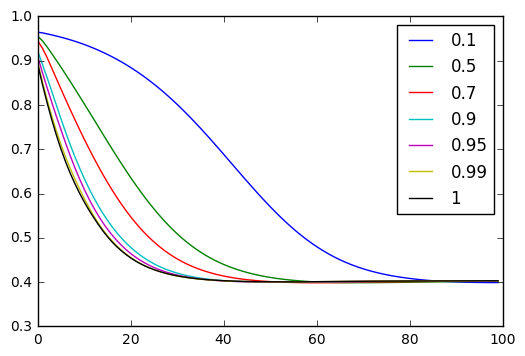

In [26]:
for i in [.1, .5, .7, .9, .95, .99, 1]:
    plt.plot(elasticnet_normalize(i, normal_bool = True), label = i)
    
plt.legend()
plt.show()

lambda: 0.1
normalize False
alpha 0.434310578675
lambda: 0.5
normalize False
alpha 0.0755482385258
lambda: 0.7
normalize False
alpha 0.0539630275184
lambda: 0.9
normalize False
alpha 0.0419712436254
lambda: 0.95
normalize False
alpha 0.039762230803
lambda: 0.99
normalize False
alpha 0.0381556760231
lambda: 1
normalize False
alpha 0.0377741192629


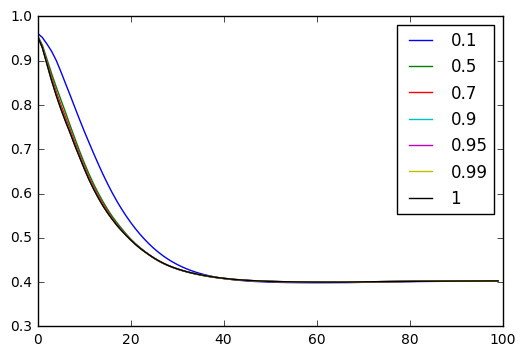

In [27]:
for i in [.1, .5, .7, .9, .95, .99, 1]:
    plt.plot(elasticnet_normalize(i, normal_bool = False), label = i)
    
plt.legend()
plt.show()